In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset1 = pd.read_csv("wdbc.data", sep=",").values

# Extracting the maximum value of the features which is being considered for best feature combination
dataset = dataset1[:,22:32]


#Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset1,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# 2 features

# worst_radius
# worst_fractal_dimension
x1 = dataset[:,0].reshape(-1,1).astype("float64")
x2 = dataset[:,9].reshape(-1,1).astype("float64")

X1 = np.concatenate((x1,x2),axis=1)

# 4 features

# worst_texture
# worst_smoothness
# worst_compactness
# worst_concave_points
x1 = dataset[:,1].reshape(-1,1).astype("float64")
x2 = dataset[:,4].reshape(-1,1).astype("float64")
x3 = dataset[:,5].reshape(-1,1).astype("float64")
x4 = dataset[:,7].reshape(-1,1).astype("float64")

X2 = np.concatenate((x1,x2,x3,x4),axis=1)

# 6 features

# worst_radius
# worst_texture
# worst_perimeter
# worst_area
# worst_concavity
# worst_concave_points
x1 = dataset[:,0].reshape(-1,1).astype("float64")
x2 = dataset[:,1].reshape(-1,1).astype("float64")
x3 = dataset[:,2].reshape(-1,1).astype("float64")
x4 = dataset[:,3].reshape(-1,1).astype("float64")
x5 = dataset[:,6].reshape(-1,1).astype("float64")
x6 = dataset[:,7].reshape(-1,1).astype("float64")

X3 = np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)

# 8 features

# worst_radius
# worst_texture
# worst_perimeter
# worst_area
# worst_smoothness
# worst_concavity
# worst_symmetry
# worst_fractal_dimension
x1 = dataset[:,0].reshape(-1,1).astype("float64")
x2 = dataset[:,1].reshape(-1,1).astype("float64")
x3 = dataset[:,2].reshape(-1,1).astype("float64")
x4 = dataset[:,3].reshape(-1,1).astype("float64")
x5 = dataset[:,4].reshape(-1,1).astype("float64")
x6 = dataset[:,6].reshape(-1,1).astype("float64")
x7 = dataset[:,8].reshape(-1,1).astype("float64")
x8 = dataset[:,9].reshape(-1,1).astype("float64")

X4 = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8),axis=1)

labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(final_data):
    report = np.empty([4,6])
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        clf = RandomForestClassifier(n_estimators=10)
        clf.fit(x_train,y_train)
        predictions = clf.predict(x_train)
        report[0,i] = classification_report(y_train,predictions,output_dict = True).get('accuracy')
        report[1,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('precision')
        report[2,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('recall')
        report[3,i] = classification_report(y_train,predictions,output_dict = True).get('macro avg').get('f1-score')
        cm = metrics.confusion_matrix(y_train, predictions)
        print("Confusion matrix:\n",cm)
        
    for j in range(4):
        report[j,5] = np.max(report[j,0:5])
    columns1 = ['Validation 1','Validation 2','Validation 3','Validation 4','Validation 5','Maximum']
    index1 = ['Accuracy','Precision','Recall','F1-Score']
    table = pd.DataFrame(data = report,columns=columns1,index=index1)
    display(table)


In [4]:
# 2 features
evaluate(final_data1)

Confusion matrix:
 [[281   1]
 [  2 170]]
Confusion matrix:
 [[288   0]
 [  6 160]]
Confusion matrix:
 [[288   0]
 [  5 161]]
Confusion matrix:
 [[282   0]
 [  2 170]]
Confusion matrix:
 [[289   0]
 [  6 159]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.993392,0.986784,0.988987,0.995595,0.986784,0.995595
Precision,0.993542,0.989796,0.991468,0.996479,0.989831,0.996479
Recall,0.992413,0.981928,0.984940,0.994186,0.981818,0.994186
F1-Score,0.992972,0.985643,0.988052,0.995309,0.985604,0.995309


In [5]:
# 4 features
evaluate(final_data2)

Confusion matrix:
 [[281   1]
 [  1 171]]
Confusion matrix:
 [[287   1]
 [  4 162]]
Confusion matrix:
 [[288   0]
 [  5 161]]
Confusion matrix:
 [[282   0]
 [  3 169]]
Confusion matrix:
 [[289   0]
 [  4 161]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.995595,0.988987,0.988987,0.993392,0.991189,0.995595
Precision,0.995320,0.990060,0.991468,0.994737,0.993174,0.995320
Recall,0.995320,0.986216,0.984940,0.991279,0.987879,0.995320
F1-Score,0.995320,0.988083,0.988052,0.992956,0.990429,0.995320


In [6]:
# 6 features
evaluate(final_data3)

Confusion matrix:
 [[282   0]
 [  0 172]]
Confusion matrix:
 [[288   0]
 [  4 162]]
Confusion matrix:
 [[288   0]
 [  3 163]]
Confusion matrix:
 [[282   0]
 [  1 171]]
Confusion matrix:
 [[289   0]
 [  3 162]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,1.0,0.991189,0.993392,0.997797,0.993392,1.0
Precision,1.0,0.993151,0.994845,0.998233,0.994863,1.0
Recall,1.0,0.987952,0.990964,0.997093,0.990909,1.0
F1-Score,1.0,0.990454,0.992850,0.997657,0.992831,1.0


In [7]:
# 8 features
evaluate(final_data4)

Confusion matrix:
 [[282   0]
 [  1 171]]
Confusion matrix:
 [[288   0]
 [  2 164]]
Confusion matrix:
 [[288   0]
 [  3 163]]
Confusion matrix:
 [[282   0]
 [  0 172]]
Confusion matrix:
 [[289   0]
 [  2 163]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.997797,0.995595,0.993392,1.0,0.995595,1.0
Precision,0.998233,0.996552,0.994845,1.0,0.996564,1.0
Recall,0.997093,0.993976,0.990964,1.0,0.993939,1.0
F1-Score,0.997657,0.995240,0.992850,1.0,0.995227,1.0


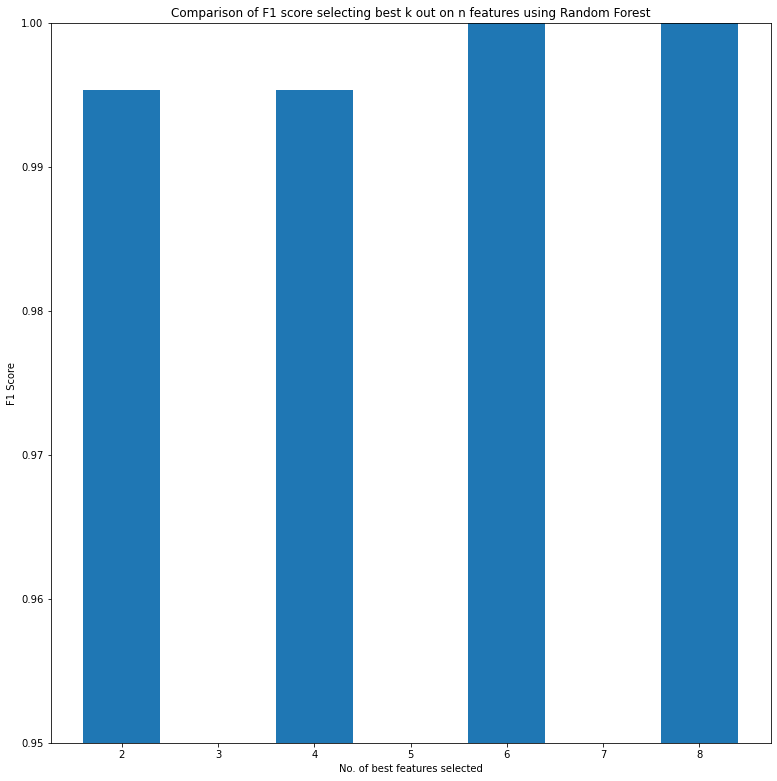

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
features = [2,4,6,8]
F1 = [0.9953,0.9953,1.0,1.0]
ax.bar(features,F1)
ax.set_xlabel('No. of best features selected')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 score selecting best k out on n features using Random Forest')
ax.set_ylim([0.95,1])
plt.show()

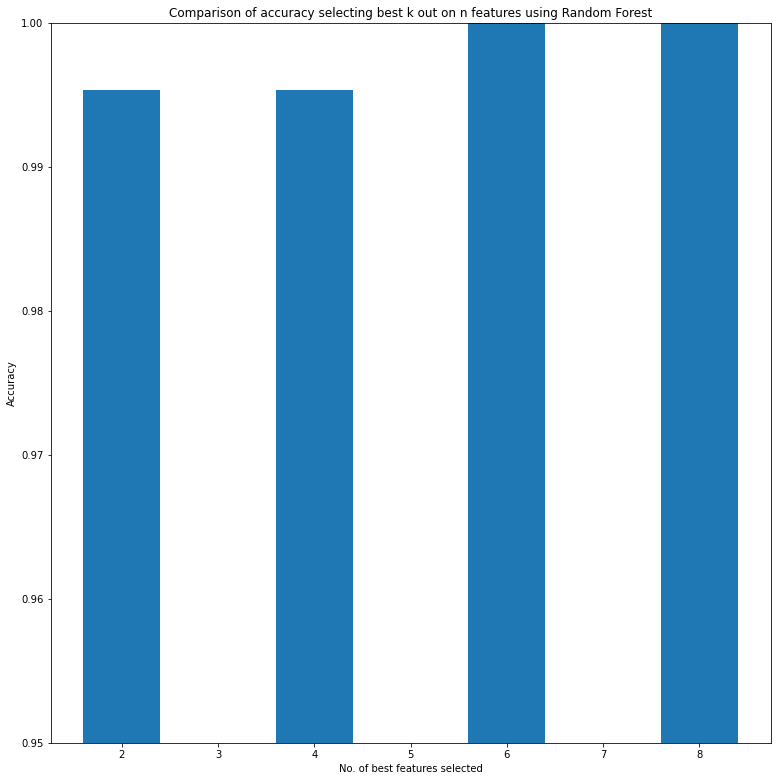

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
features = [2,4,6,8]
accuracy = [0.9956,0.9956,1,1]
ax.bar(features,F1)
ax.set_xlabel('No. of best features selected')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of accuracy selecting best k out on n features using Random Forest')
ax.set_ylim([0.95,1])
plt.show()